# Content

- **Goal of the Notebook**
- Import Libraries
- **Exploratory Data Analysis (EDA)**
    - Target 'price'
    - Features
- **Missing Values**
    - Bathroom
    - Bedroom
    - Building_id
    - Description
    - Feature
- **Feature-Engineering**
    - Created
    - Discription 
    - Feature
    - Latitude and Longitude
    - Managers
    - Images
- **(Encoding)**
- **Base model**
    - Ridge
    - Lasso
    - ElasticNet
    - RandomForest
- **Hyperparamert Tuning**
    - Ridge
    - Lasso
    - ElasticNet
    - RandomForest
- **Comparison**
- **Conclusion**

## Goal of the Notebook

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
color = sns.color_palette()
from scipy import stats
import matplotlib.gridspec as gridspec
import statsmodels.formula.api as smf
import os
from PIL import Image
import pandas_profiling as pp

from tqdm import tqdm, tqdm_notebook

from geopy.extra.rate_limiter import RateLimiter

#pip install geopy
import geopy
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter

In [2]:
df = pd.read_json('data/train.json')
np.random.seed(123)
df = df.sample(frac=1) # shuffle data

df_dev, df_test = train_test_split(df, test_size=0.15)
df_train, df_valid = train_test_split(df_dev, test_size=0.15)
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
34100,1.0,2,9b24b9d24d253837fa7ee86eb436530e,2016-06-10 02:21:59,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,West End Avenue,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7957,7134136,-73.9727,e0af09eba42a9af0626d15c8d9505043,[https://photos.renthop.com/2/7134136_2d8df5c3...,4890,752 West End Avenue,low
45041,2.0,2,1e68ab3dd372d796501b117ddf197985,2016-05-14 05:26:27,,East 1st Street,"[Cats Allowed, Dogs Allowed]",40.7238,7013391,-73.9898,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],4195,47 East 1st Street,low
94327,1.0,0,83ec3cf6c56a458b9f0cc455fee2d000,2016-04-09 03:21:05,In the heart of one of Manhattan's hottest nei...,West 14th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7399,6848107,-74.0036,277517a143b394a4f404c2e3e34c12ea,[https://photos.renthop.com/2/6848107_a308df32...,2549,316 West 14th Street,low
114382,1.0,0,e1aa5420ac02e7926ce0dc1e921b12fe,2016-04-02 01:39:01,,West 83rd Street,[Furnished],40.7844,6812685,-73.9728,62b685cc0d876c3a1a51d63a0d6a8082,[],2995,67 West 83rd Street,low
88517,2.0,3,0,2016-04-27 06:42:14,Apartment Features:*Exposed brick*Balcony*Quee...,E 6th St.,"[Balcony, Laundry in Unit, Dishwasher, Hardwoo...",40.7266,6933446,-73.9872,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6933446_096c08eb...,6250,330 E 6th St.,low


## Exploratory Data Analysis
First we need to assess the number of NA values in the test, train and the validation data sets

In [3]:
# show features with count of NaN values
s = df.isnull().sum()
s = s.sort_values(ascending=False)
print(s)

interest_level     0
street_address     0
price              0
photos             0
manager_id         0
longitude          0
listing_id         0
latitude           0
features           0
display_address    0
description        0
created            0
building_id        0
bedrooms           0
bathrooms          0
dtype: int64


We don't need to handle missing values cases since all the columns and the three data sets don't have any missing values.
Let's explore the unique values per column

In [4]:
for col in df.columns:
    try:
        print(col, ': ' ,df[col].nunique())
    except:
        pass

bathrooms :  15
bedrooms :  9
building_id :  7585
created :  48675
description :  38244
display_address :  8826
latitude :  2335
listing_id :  49352
longitude :  1677
manager_id :  3481
price :  2808
street_address :  15358
interest_level :  3


Text(0, 0.5, 'count')

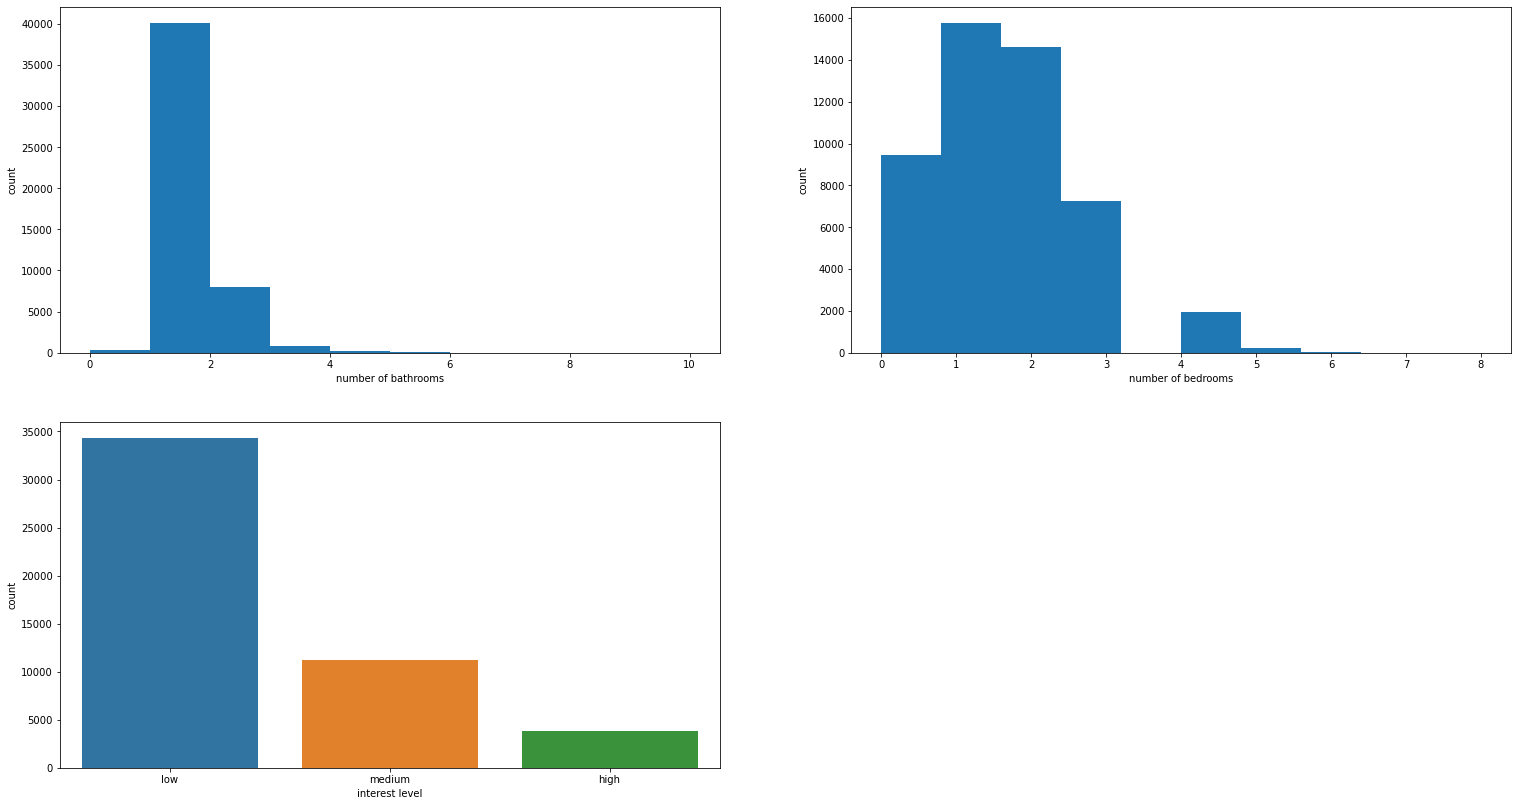

In [5]:
#create some histograms on the numeric features and interest level

np.warnings.filterwarnings('ignore')

plt.figure(figsize=(26,14))
plt.subplot(2,2,1)
plt.hist(df["bathrooms"])
plt.xlabel("number of bathrooms")
plt.ylabel("count")

plt.subplot(2,2,2)
plt.hist(df["bedrooms"])
plt.xlabel("number of bedrooms")
plt.ylabel("count")

plt.subplot(2,2,3)
interestcount=df["interest_level"].value_counts()
#plt.figure(figsize=(8,4))
sns.barplot(interestcount.index, interestcount.values)
plt.xlabel("interest level")
plt.ylabel("count")


#plt.subplot(2,2,4)
#plt.hist(df["photo_count"])
#plt.xlabel("number of photos")
#plt.ylabel("count")

In [6]:
#How is price distributed?

print("max price: " + str(df["price"].max()))
print("mean price: " + str(df["price"].mean()))
print("median price: " + str(df["price"].median()))
print("lower quartile of price: " + str(df["price"].quantile(0.25)))
print("upper quartile of price: " + str(df["price"].quantile(0.75)))
iqr=df["price"].quantile(0.75)-df["price"].quantile(0.25)
print("IQR of price: " + str(iqr))
upper_whisker=df["price"].quantile(0.75)+1.5*iqr
print("the upper whisker of price ranges up to: " + str(upper_whisker))
#we see that the maximum price is very high and looking at mean and median value it is clearly an outlier. 
#So we will not plot the complete range of price but rather to the double range of the upper whisker (12000)

max price: 4490000
mean price: 3830.174035500081
median price: 3150.0
lower quartile of price: 2500.0
upper quartile of price: 4100.0
IQR of price: 1600.0
the upper whisker of price ranges up to: 6500.0


(-1000.0, 12000.0)

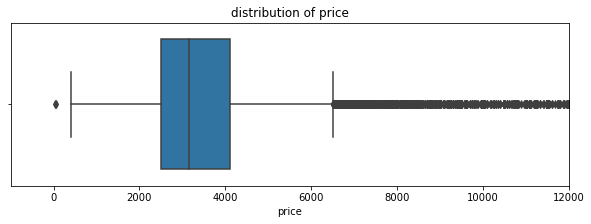

In [7]:
#boxplot on the distribution of our target variable 'price'
plt.figure(figsize=(10,3))
sns.boxplot(x="price",data=df)
plt.title("distribution of price")
plt.xlim(-1000,12000)

(-1000.0, 12000.0)

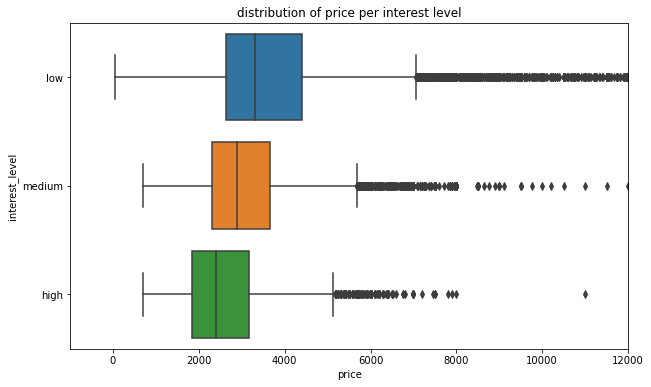

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x="price", y="interest_level",data=df)
plt.title("distribution of price per interest level")
plt.xlim(-1000,12000)
#we see that the mean price of low interest objects is higher, and for high interest objects the median price is lower

In [9]:
# Create a function to understand target 'price' even better
def plot_3_graph(df, feature):
    '''Create three (histogram, probability and box plot) graphs to analyze target (price).
    requirements: Importing seaborn, matplotlab and scipy modules'''

    # Set style
    style.use('fivethirtyeight')

    # Creating a customized chart and giving in figsize 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    
    # creating a grid of 3 cols and 3 rows
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    # Customizing the histogram grid 
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title. 
    ax1.set_title('Histogram')
    # plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot 
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title
    ax2.set_title('QQ_plot')
    # Plotting the QQ_Plot
    stats.probplot(df.loc[:,feature], plot = ax2)

    # Customizing the Box Plot 
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title
    ax3.set_title('Box Plot')
    # Plotting the box plot
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

In [10]:
def plot_3_graph_log(df, feature):
    '''Create three (histogram, probability and box plot) graphs to analyze target (price). 
    Do we get closer to the normal distribution with log?
    requirements: Importing seaborn, matplotlab and scipy modules'''

    # Set style
    #style.use('fivethirtyeight')

    # Creating a customized chart. and giving in figsize 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    
    # creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    # Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title. 
    ax1.set_title('Histogram')
    # plot the histogram. 
    sns.distplot(np.log(df.loc[:,feature]), norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title. 
    ax2.set_title('QQ_plot')
    # Plotting the QQ_Plot. 
    stats.probplot(np.log(df.loc[:,feature]), plot = ax2)

    # Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title. 
    ax3.set_title('Box Plot')
    # Plotting the box plot. 
    sns.boxplot(np.log(df.loc[:,feature]), orient='v', ax = ax3);

In [11]:
# Get median, mean and max of price and sort price
print('max value:', df['price'].max(), 'mean value:',  df['price'].mean(),  'median value:', df['price'].median(),'min value:', df['price'].min())
print(df["price"].sort_values())

max value: 4490000 mean value: 3830.174035500081 median value: 3150.0 min value: 43
53144          43
87511          45
117339        401
113552        695
85617         695
           ...   
123877     135000
57803     1070000
55437     1070000
12168     1150000
32611     4490000
Name: price, Length: 49352, dtype: int64


In [12]:
# Be aware run this cell could takes long 
# pp.ProfileReport(df)

In [13]:
df['log price'] = (df['price']+1).transform(np.log)

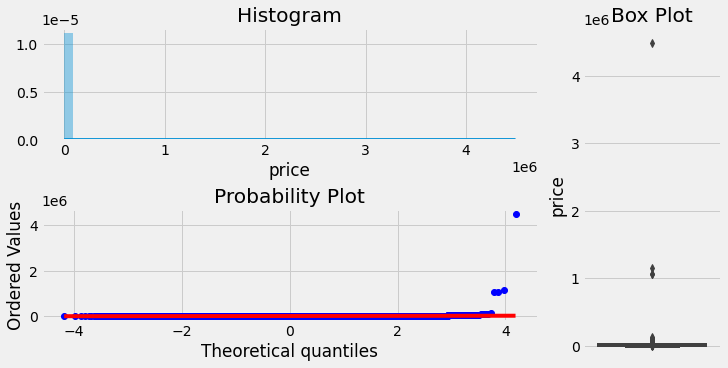

In [14]:
# Plot histogram, probability plot and box plot
plot_3_graph(df, 'price')

In [15]:
# Can we get closer to the normal distribution and get rid of outliers?
df = df[(df["price"] >= 100)]
df = df[(df["price"] <= 150_000)]
df.shape

(49346, 16)

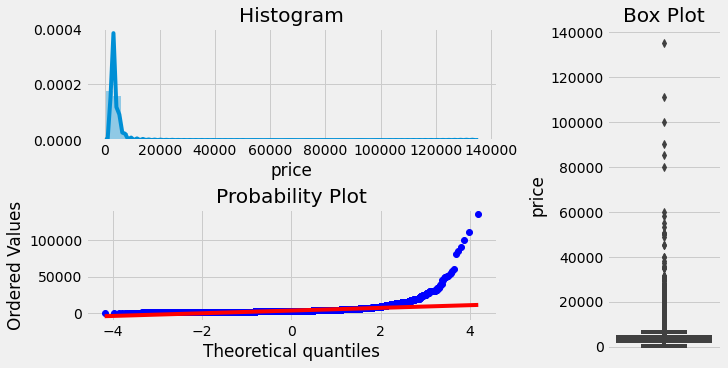

In [16]:
# Plot histogram, probability plot and box plot
plot_3_graph(df, 'price')

In [ ]:
# Plot histogram, probability plot and box plot
plot_3_graph_log(df, 'price')

## Missing Values
Let's identify values that are missing and create a strategy to use those rows!

### 'Bathroom' Column

In [27]:
# Get value counts of bathrooms
df.bathrooms.value_counts()

# some more statistics 
print(df.bathrooms.median(),df.bathrooms.mean(), df.bathrooms.mode())

1.0 1.2121798508672395 0    1.0
dtype: float64


In [28]:
# Let's replace the 0 (9475) with 1. Median is robuster than mean
df.bathrooms.replace(0, df.bathrooms.median())

34100     1.0
45041     2.0
94327     1.0
114382    1.0
88517     2.0
         ... 
19664     1.0
38657     2.0
44635     1.0
70524     2.0
39514     1.0
Name: bathrooms, Length: 49352, dtype: float64

### 'Bedroom' Column

In [29]:
# Get value counts of bedrooms
df.bedrooms.value_counts()

# some more statistics 
print(df.bedrooms.median(),df.bedrooms.mean(), df.bedrooms.mode())

1.0 1.5416396498622142 0    1
dtype: int64


In [30]:
# Let's replace the 0 (313) with 1. Median is robuster than mean
df.bedrooms.replace(0, df.bedrooms.median())

34100     2
45041     2
94327     1
114382    1
88517     3
         ..
19664     1
38657     2
44635     1
70524     2
39514     1
Name: bedrooms, Length: 49352, dtype: int64

### 'Building_id' Column

In [31]:
# Get value counts for data['log+1'] = (data['value']+1).transform(np.log)features (8286 0)
df.building_id.value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
65236f52215952560b82accddace8e55       1
347aaf4b6dcd72dca474cb160837842c       1
63ee736f378c83cad8de2002a0079790       1
5dfaf6907054221ad63d364271b8fa19       1
95d288ceb9603c691ea001910dba892a       1
Name: building_id, Length: 7585, dtype: int64

### 'Features' Column

In [32]:
# Get value counts for features (3218[])
df.features.value_counts()

[]                                                                                                                3218
[Pre-War, Dogs Allowed, Cats Allowed]                                                                             1400
[Cats Allowed, Dogs Allowed]                                                                                      1080
[Hardwood Floors]                                                                                                 1050
[Pre-War]                                                                                                          937
                                                                                                                  ... 
[Hardwood Floors, High Ceiling, Light]                                                                               1
[Loft, Laundry in Unit, Hardwood Floors, Cats Allowed, Dogs Allowed, Multi-Level, Dishwasher]                        1
[** EXQUISITE RIVERSIDE SPECIAL! * STUNNING STUD

### 'Description' Column

In [33]:
# Get value counts for Desription (1647[])
df.description.value_counts()

## Feature-Engineering
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data

### 'Created' Column 

Let's try to split the 'created' column into year, month and day to change the creation date into a useable categorical factor.

In [34]:
df['listing_year']  = pd.DatetimeIndex(df['created']).year
df['listing_month'] = pd.DatetimeIndex(df['created']).month
df['listing_day/month']   = pd.DatetimeIndex(df['created']).day

In [35]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,log price,listing_year,listing_month,listing_day/month
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04,49352.000000,49352.0,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03,8.099363,2016.0,5.014852,15.206881
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04,0.432710,0.0,0.824442,8.280749
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01,3.784190,2016.0,4.000000,1.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03,7.824446,2016.0,4.000000,8.000000
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03,8.055475,2016.0,5.000000,15.000000
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03,8.318986,2016.0,6.000000,22.000000
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06,15.317363,2016.0,6.000000,31.000000


It seems that the listings were created all in 2016 between April and June (included). We should therefore drop **listing_year** as it is redundant. 

Now, it would be also interesting to know which day of the week was each listing posted instead of only knowing which day of the month.

In [36]:
df = df.drop(['listing_year'], axis=1)

In [37]:
df['listing_day/week'] = pd.DatetimeIndex(df['created']).dayofweek
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,log price,listing_month,listing_day/month,listing_day/week
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03,8.099363,5.014852,15.206881,2.922131
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04,0.432710,0.824442,8.280749,1.784798
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01,3.784190,4.000000,1.000000,0.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03,7.824446,4.000000,8.000000,1.000000
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03,8.055475,5.000000,15.000000,3.000000
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03,8.318986,6.000000,22.000000,4.000000
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06,15.317363,6.000000,31.000000,6.000000


Apart from that, the information about the time frame is important since the rental price is a time sensitive parameter (the price for one apartment varies over time). However, we can expect that the influence over a course of three month is marginal.

**'Description' column**

In [38]:
df_desc=pd.DataFrame(df["description"])
df_desc.head(10)

,description
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...
45041,
94327,In the heart of one of Manhattan's hottest nei...
114382,
88517,Apartment Features:*Exposed brick*Balcony*Quee...
119298,Your own loft apartment on the same block as a...
42041,Magnificent views with wrap-around Jet-Set bal...
110738,Pet friendly building. Apartment features newl...
86817,Brand New apartment approximate 650 sqft amazi...
47952,"<![CDATA[2 bedrooms, 2350, Bedford Stuyvesant/..."


First of all we introduce a new column on description length. Maybe a landlord puts more/less effort in the description of a liting which is more expensive/cheaper?

In [39]:
df_desc["desc_len"]=df_desc["description"].apply(lambda x:len(str(x)))
df_desc.head(2)

,description,desc_len
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,896
45041,,8


We see that the description fields contain one big string, with any kind of letters, digits and punctuation. Like this we cannot give it to a model, so we were thinking of a method of how to use the information in this column. We came up with the idea to extract keywords, and make columns out of these, just like we did for the "features" column. The first step is, to transform every string to lowercase, remove special characters and all digits.

In [40]:
import re
def pre_process (text):
    #lowercase everything
    text=text.lower()
    
    #remove tags
    text=re.sub ("&lt;/?.*?&gt;", "&lt;&gt; ", text)
    
    #remove special characters and digits
    
    text=re.sub("(\\d|\\W)+", " ", text)
    
    return text

df_desc["description_pre"]=df_desc["description"].apply(lambda x: pre_process(x))

df_desc.head(10)

,description,desc_len,description_pre
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,896,no fee month free condo finishes large bd ba l...
45041,,8,
94327,In the heart of one of Manhattan's hottest nei...,891,in the heart of one of manhattan s hottest nei...
114382,,0,
88517,Apartment Features:*Exposed brick*Balcony*Quee...,532,apartment features exposed brick balcony queen...
119298,Your own loft apartment on the same block as a...,947,your own loft apartment on the same block as a...
42041,Magnificent views with wrap-around Jet-Set bal...,869,magnificent views with wrap around jet set bal...
110738,Pet friendly building. Apartment features newl...,569,pet friendly building apartment features newly...
86817,Brand New apartment approximate 650 sqft amazi...,492,brand new apartment approximate sqft amazing s...
47952,"<![CDATA[2 bedrooms, 2350, Bedford Stuyvesant/...",447,cdata bedrooms bedford stuyvesant bushwick cr...


In the next step we will transform the description string into a list of keywords. We are using the nltk package to tokenize (=to seperate the text into words with comma) and to remove stopwords (=words that are definitely no keywords, e.g. "with", "to", "of" or "very"). In order to be able to run the nltk functions, the **nltk packages "stopwords" and "punkt" must be downloaded**. Therefore the code below must be "uncommented" and executed.

In [41]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [42]:
stop_words=stopwords.words('english')

def get_keywords(row):
    """transforms text into keywords, leaving out stopwords"""
    row_desc=row["description_pre"]
    tokens=nltk.tokenize.word_tokenize(row_desc)
    keywords=[keyword for keyword in tokens if keyword.isalpha() and not keyword in stop_words]
    keywords_string= ','.join(keywords)
    return keywords_string

df_desc["keywords"]=df_desc.apply(get_keywords, axis=1)
df_desc.head(10)

,description,desc_len,description_pre,keywords
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,896,no fee month free condo finishes large bd ba l...,"fee,month,free,condo,finishes,large,bd,ba,loca..."
45041,,8,,
94327,In the heart of one of Manhattan's hottest nei...,891,in the heart of one of manhattan s hottest nei...,"heart,one,manhattan,hottest,neighborhoods,meat..."
114382,,0,,
88517,Apartment Features:*Exposed brick*Balcony*Quee...,532,apartment features exposed brick balcony queen...,"apartment,features,exposed,brick,balcony,queen..."
119298,Your own loft apartment on the same block as a...,947,your own loft apartment on the same block as a...,"loft,apartment,block,famous,nfl,superbowl,winn..."
42041,Magnificent views with wrap-around Jet-Set bal...,869,magnificent views with wrap around jet set bal...,"magnificent,views,wrap,around,jet,set,balcony,..."
110738,Pet friendly building. Apartment features newl...,569,pet friendly building apartment features newly...,"pet,friendly,building,apartment,features,newly..."
86817,Brand New apartment approximate 650 sqft amazi...,492,brand new apartment approximate sqft amazing s...,"brand,new,apartment,approximate,sqft,amazing,s..."
47952,"<![CDATA[2 bedrooms, 2350, Bedford Stuyvesant/...",447,cdata bedrooms bedford stuyvesant bushwick cr...,"cdata,bedrooms,bedford,stuyvesant,bushwick,cro..."


First of all, we can generate a new column "keyword_count" which indicates just the amount of keywords in the description. It might be a hint if a landlord has put a lot of effort in describing a listing, which could be necessary due to a high price.

In [43]:
df_desc["keyword_count"]=df_desc["keywords"].apply(lambda x: len(x.split(',')))
df_desc.head(2)

,description,desc_len,description_pre,keywords,keyword_count
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,896,no fee month free condo finishes large bd ba l...,"fee,month,free,condo,finishes,large,bd,ba,loca...",100
45041,,8,,,1


Now, we want to get a notion on the **most often used keywords**, manually find those which describe apartments well and then create a column for these. We are especially looking for **descriptive adjectives**, information about **surrounding** (e.g. "restaurants") and infomation about **amenities** inside the flat (like "microwave").

In [44]:
#extract all keywords from the keywords column and write them into a list
import numpy as np
all_keywords=df_desc["keywords"].str.cat().split(',')
all_keywords[:10]

['fee',
 'month',
 'free',
 'condo',
 'finishes',
 'large',
 'bd',
 'ba',
 'located',
 'prewar']

In [45]:
#create a list of unique keywords
unique_keywords=list(set(all_keywords))
print('count of all keywords: '+ str(len(all_keywords)))
print('number of unique keywords: '+ str(len(unique_keywords)))

count of all keywords: 3161531
number of unique keywords: 41533


In [46]:
#use the counter to create a new dataframe with all keywords and there occurances in the dataframe.
#We are looking at the keywords manually in the next step and will use the count column to decide whether it is worth introducing a new column.
from collections import Counter
counts=Counter(all_keywords)
df_counts=pd.DataFrame.from_records(counts.most_common(), columns=["keyword", "count"])

In [47]:
#This step was used to select desc_cols, it is not needed anymore and therefore commented out:

#df_counts.to_excel("feature_counts.xlsx")

In [48]:
desc_cols=['renovated', 'stainless', 'large', 'high', 'great', 'marble', 'park', 'granite', 'restaurants', 'dishwasher', 'private', 'spacious', 'amenities', 'luxury', 'beautiful', 'light', 'washer', 'free', 'central', 'subway', 'fitness', 'amazing', 'shopping', 'open', 'natural', 'service', 'super', 'heart', 'upper', 'best', 'gym', 'queen', 'microwave', 'river', 'friendly', 'parking', 'exclusive', 'bright', 'sun', 'rooftop', 'gorgeous', 'price', 'quiet', 'balcony', 'bar', 'nightlife']

#currently the keyword column contains still one single string containing of various words and commas
#in this step we are transforming it into a list of strings, so we can then iterate over every word seperately
df_desc['keyw_lists']=df_desc['keywords'].apply(lambda x: list(x.split(",")))
df_desc.head()

,description,desc_len,description_pre,keywords,keyword_count,keyw_lists
34100,NO FEE & 1 MONTH FREE!!! Condo finishes large ...,896,no fee month free condo finishes large bd ba l...,"fee,month,free,condo,finishes,large,bd,ba,loca...",100,"[fee, month, free, condo, finishes, large, bd,..."
45041,,8,,,1,[]
94327,In the heart of one of Manhattan's hottest nei...,891,in the heart of one of manhattan s hottest nei...,"heart,one,manhattan,hottest,neighborhoods,meat...",93,"[heart, one, manhattan, hottest, neighborhoods..."
114382,,0,,,1,[]
88517,Apartment Features:*Exposed brick*Balcony*Quee...,532,apartment features exposed brick balcony queen...,"apartment,features,exposed,brick,balcony,queen...",64,"[apartment, features, exposed, brick, balcony,..."


In [49]:
#transform keywords into binary columns with the sklearn MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_desc_cols= pd.DataFrame(mlb.fit_transform(df_desc['keyw_lists']), columns= mlb.classes_)

#because the MLB creates a column for EACH keyword it finds in the data, we will now remove most of the columns again, 
#only keeping the choices of words we picked in the desc_cols list
df_desc_cols = df_desc_cols [desc_cols]
df_desc_cols.head()

,renovated,stainless,large,high,great,marble,park,granite,restaurants,dishwasher,...,exclusive,bright,sun,rooftop,gorgeous,price,quiet,balcony,bar,nightlife
0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0


Now we will concatenate the df_desc containing the keyword count column and the new df_desc_cols together to the final dataframe about "Description". This is everything we will do with this column, so we drop the original column and the columns we just had created for intermediate steps.

In [50]:
#during the MultiLabelbinarizer step, we have lost the original indices. 
#As pandas is not able to join properly two dfs with different indices, 
#we first have to reset them for both dataframes.

df_desc.reset_index(drop=True, inplace=True)
df_desc_cols.reset_index(drop=True, inplace=True)

final_description=pd.concat([df_desc,df_desc_cols], axis=1)
final_description=final_description.drop(["description", "description_pre", "keywords", "keyw_lists"], axis=1)

#saving everything to a pickle file, just in case :-)
final_description.to_pickle("./final_description.pkl")

final_description.head()

,desc_len,keyword_count,renovated,stainless,large,high,great,marble,park,granite,...,exclusive,bright,sun,rooftop,gorgeous,price,quiet,balcony,bar,nightlife
0,896,100,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,891,93,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,532,64,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0


In [51]:
#Finally, we concatenate our Dataframe we have generated for the description again with the full df, to continue with the next features

df.reset_index(drop=True, inplace=True)

df=pd.concat([final_description,df], axis=1)

**'Feature' column**

In [52]:
#creating a subset of our dataframe, just for the sake of avoiding distraction
df_feat=pd.DataFrame(df["features"])

#creating an array with the unique features, as they are in the original data. 
#To already put some of them together, all letters will be lowercased:
unique_features=df_feat['features'].explode().str.lower().unique()
print("unique features original: " + str(unique_features.size))
print("total amount of features: "+ str(df_feat['features'].explode().size))

#just to hava a nothion of how often features are repeated, we are printing out the number of occurances:
print(df_feat.features.explode().str.lower().value_counts())

unique features original: 1295
total amount of features: 271124
elevator                                                                                                    26273
hardwood floors                                                                                             23558
cats allowed                                                                                                23540
dogs allowed                                                                                                22035
doorman                                                                                                     20967
                                                                                                            ...  
** classy condo gem! * massive 2br super share * gourmet kitchen * perfect sun * chic chelsea locale! **        1
** modern village marvel * sprawling 2br home * exposed brick * lndry bldg * near the park **                   1
9th floor manhattan view

The most common feature "elevator" is a feature of over 26000 listings. From our understanding of the flat market, it can really be relevant for the rent price. But as features are sometimes written differently, we will apply some fuzzy matching in the following, to summarize similar features under the same label.

In [53]:
#pip install fuzzywuzzy
#pip install python-Levenshtein
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

As we saw in the last rows of the printout before, some feature descriptions are really long. We will sort these ones out and store our new choices in a new list of strings:

In [54]:
unique_short_features = []
for x in unique_features:
    if len(str(x))<25:
        unique_short_features.append(str(x))

len(unique_short_features)

934

Nice, we got rid of more than 300 really long feature descriptions that were not suitable to become labels in the later processing. We have not dropped it from the data entirely, we are just not considering for the final labels of columns.

In the next step we will compare every feature in our shortlist with every other feature from that same list and calculate their similarity with the "fuzz.token_sort_ratio" scorer. The results are stored in a new df "similarity_sort."

In [55]:
#The code in this box has been copied from this blogpost:
#https://towardsdatascience.com/fuzzywuzzy-find-similar-strings-within-one-column-in-a-pandas-data-frame-99f6c2a0c212

score_sort1 = [(x,) + i
             for x in unique_short_features 
             for i in process.extract(x, unique_short_features,scorer=fuzz.token_sort_ratio)]

#Create a dataframe from the tuples
similarity_sort = pd.DataFrame(score_sort1, columns=['feature_sort','match_sort','score_sort'])
similarity_sort.head(10)



#similarity_sort.to_excel("similarity_sort.xlsx")

,feature_sort,match_sort,score_sort
0,swimming pool,swimming pool,100
1,swimming pool,indoor swimming pool,79
2,swimming pool,wine cooler,58
3,swimming pool,wine cooler.,58
4,swimming pool,spin room,55
5,doorman,doorman,100
6,doorman,ft doorman,82
7,doorman,24/7 doorman,74
8,doorman,24hr doorman,74
9,doorman,24 hr doorman,70


In order to check out wich threshold makes sense for our case, we exported the result of our comparisons to Excel. At this point we sensed, that the threshold must be decided by a human, who knows the context and can estimate the risk of falsely classified features.

We manually checked until which matching value the matches made sense. At a similarity score of 77, "no fee" was matched with "low fee", thats were we want to stop the matching. Therefore we set our threshold to 78.

In the next step we are matching all our similar features (with a similarity score of 78 or above) together, and therefore removing fuzzy dupliates

In [56]:
#remove duplicates with min similarity of 78. The final feature string will be the first encounter of this feature in the list
matched_features=process.dedupe(unique_short_features, threshold=78, scorer=fuzz.token_sort_ratio)

#transform the output into a list so it can be used in the following function replace_fuzzy_matches
choices=list(matched_features)

#creating a new column "matched features"
df_feat['matched_features']=df_feat['features']

def replace_fuzzy_matches (featurelist, choices):
    """the function iterates over a list of features and compares each word of that list with every item in the "choices" list. 
    It replaces every word with its highest scoring match from the choices list."""
    new_featurelist=[]
    for i in range(len(featurelist)):
        new_featurelist.append(process.extractOne(featurelist[i],choices, scorer=fuzz.token_sort_ratio)[0])
    return new_featurelist

in the following the function will be executed on the comlete dataframe column. As this takes several hours, we are saving the file as serialized pickle file in order to be able to use it later again without having to compute everything again.

In [ ]:
df_feat['matched_features']=df_feat['matched_features'].apply(lambda x: replace_fuzzy_matches(x, choices)) 
df_feat.to_pickle("./df_feat.pkl")

In [ ]:
#in order to load the previously computed df, execute:
df_feat=pd.read_pickle("./df_feat.pkl")

df_feat.head(10)

Now we have cleaned all feature wordings so that they are common in all listings of the dataframe. In the next step we want to create columns for the most popular features which will contain binary data (1 if the feature is a feature of the listing, 0 if the feature is not included in that listing. This will enable us to later use this information when we fit our models later.

In [ ]:
#getting the most popular 50 features
import itertools
from collections import Counter
a = list(df_feat['matched_features'].values.flatten())
feature_list = list(itertools.chain.from_iterable(a))
top_50_features = [ x for x, y in Counter(feature_list).most_common(50)]
print(top_50_features)

From the printout above we see that even after the automated fuzzy matching, some of the features can still be clustered together:

- 'hardwood flooring' & 'hardwood'
- 'ft doorman' & 'concierge'
- 'laundry in building!' & 'laundry room' & 'onsite dry cleaner'
- 'in unit washer & dryer' & 'laundry.' & 'washer & dryer'
- 'indoor swimming pool' & 'pool'
- 'common outdoor space' & 'publicoutdoor'*

We will do this by adding the columns of these features.

In [ ]:
#Lets first create columns for every feature, using MultiLabelBinarizer:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_fbin= pd.DataFrame(mlb.fit_transform(df_feat['matched_features']), columns= mlb.classes_)
df_fbin.shape

In [ ]:
#This big amount of columns will probably lead to overfitting, so we will now only keep
#the top 50 features and as well put together the columns with the same meaning, 
#as described before.
df_fbin=df_fbin[top_50_features]

df_fbin['hardwood flooring']=df_fbin['hardwood flooring'] + df_fbin['hardwood']
df_fbin['ft doorman']=df_fbin['ft doorman'] + df_fbin['concierge']
df_fbin['laundry in building!']=df_fbin['laundry in building!'] + df_fbin['laundry room'] + df_fbin['onsite dry cleaner']
df_fbin['in unit washer & dryer']=df_fbin['in unit washer & dryer'] + df_fbin['laundry.'] + df_fbin['washer & dryer']
df_fbin['pool']=df_fbin['pool'] + df_fbin['indoor swimming pool']
df_fbin['common outdoor space']=df_fbin['common outdoor space'] + df_fbin['publicoutdoor']

df_fbin=df_fbin.drop(['hardwood', 'concierge', 'laundry room', 'onsite dry cleaner', 'washer & dryer', 'laundry.', 'indoor swimming pool', 'publicoutdoor'], axis=1)

df_fbin.head(2)

We are almost done with the engineering of the feature column. Lastly, we will just count the number of features and create a new column for that. Maybe it will as well have an impact on price.

In [ ]:
df_feat["feature_count"] = df_feat["features"].apply(lambda x: len(x))
df_feat.head()

The last step now is not to concatenate our df including the binary feature columns, df_feat and the original df. Then we will finally drop the "features" and the "matched_features" column.

In [ ]:
#during the MultiLabelbinarizer step, we have lost the original indices. 
#As pandas is not able to join properly two dfs with different indices, 
#we first have to reset them for both dataframes.

df_feat.reset_index(drop=True, inplace=True)
df_fbin.reset_index(drop=True, inplace=True)

final_features=pd.concat([df_feat,df_fbin], axis=1)


#saving everything to a pickle file, just in case :-)
final_features.to_pickle("./final_features.pkl")


final_features.head()

In [ ]:
#merge features with original df again and drop processed columns
df=pd.concat([final_features,df], axis=1).drop(["features", "matched_features"], axis=1)

Now, let's have a look at the target variable **price**...

In [ ]:
plt.hist(df['price'].dropna(), bins=10)
plt.show()

There are outliers in the price which we need to get rid of for visualisation... 

In [ ]:
#find out value of the 99th percentile
plimit = np.percentile(df["price"], 99)

# remove outlier above the 99th percentile
data = df['price'][df["price"] < plimit]

plt.hist(data, bins=50, color='green', alpha=0.7)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

The majority of the data looks rather normally distributed but there are many outliers in higher price ranges.

### Longitude and Latitude

Now, we are going to use the geopy library geopy to get the full address from the coordinates as explained [here](https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6). This will allow us to get the detailed address of each set of coordinates.

In [ ]:
#Let's create a temporary dataframe to store the coordinates based on the building ids
temp_df = df[["building_id", "longitude", "latitude"]]
building_ids = df["building_id"].values
unique_building_ids = np.unique(building_ids)

#Let's create a temporary dataframe to store the addresses based on the building ids
addresses_df = pd.DataFrame(data = unique_building_ids, columns=["building_id"])
addresses_df = pd.merge(addresses_df, temp_df, how = 'left', on = "building_id")
addresses_df['coordinate'] = addresses_df['latitude'].map(str) + ',' + addresses_df['longitude'].map(str)
addresses_df = addresses_df.drop(columns=["longitude", "latitude"])
addresses_df = addresses_df.groupby(by = "building_id").max()
addresses_df = addresses_df.head(20)

In [ ]:
#tqdm_notebook().pandas()
#geolocator = geopy.Nominatim(user_agent='myGeocoder')

#rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.001)

#addresses_df['Full Address'] = addresses_df['coordinate'].progress_apply(rgeocode)

In [ ]:
addresses_df.head(20)

In [ ]:
#Making a copy to avoid running the previous section twice
addresses_df_save = addresses_df.copy()

#Changing the building_id from index to column
addresses_df_save = addresses_df_save.reset_index()

#Concatenate all columns into one
addresses_df_save['All columns'] = addresses_df_save["building_id"].astype(str) + "," +addresses_df_save['Full Address'].astype(str)

#Creating new dataframe with the separated location info
loc_df = pd.DataFrame(addresses_df_save['All columns'].apply(lambda x: x.split(",")).tolist(), columns = ['building_id','Number', 'Street','Neighborhood', 'Community Board', 'Borough', 'County', 'City', 'Postal Code', 'Country', 'Other1', 'Other2', 'Other3'])

loc_df.head(20)

The data seems a bit messy, we need to align every column with the right value. For that we can create a function that does this cleaning.

In [ ]:
#Clean rows where the address is larger than usual
def clean_address_data1(dff):
    #iterate over all rows of data frame
    for i in range(dff.shape[0]):
        e = 12
        #Loop to check by how many columns the data is misaligned
        while e > 9:
            if(dff.iloc[i][e] == " United States"):
                a = 8
                # Loop to reassign each value to its correct column
                while a != -1:
                    dff.iloc[i][9-a] = dff.iloc[i][e-a]
                    a -= 1
                break
            else:
                e -= 1
    return dff


#Clean rows where the address is smaller than usual
def clean_address_data2(dff):
    #iterate over all rows of data frame
    for i in range(dff.shape[0]):
        e = 4
        #Loop to check by how many columns the data is misaligned
        while e < 9:
            if(dff.iloc[i][e] == " United States"):
                a = 9
                b = a-e
                # Loop to reassign each value to its correct column
                while a != 1:
                    dff.iloc[i][a] = dff.iloc[i][a-b]
                    a -= 1
                break
            else:
                e += 1
    return dff

#Resets the data frame to its origin and cleans it again
#The resetting is important because the first cleaning function cannot be run an already cleaned dataset
def reset_clean_data(dff):
    dff2 = dff.copy()
    dff2 = clean_address_data1(dff2)
    dff2 = clean_address_data2(dff2)
    return df2

In [ ]:
clean_loc_df = reset_clean_data(loc_df)
clean_loc_df.head(20)

In [ ]:
#Meging the temporary location dataframe with the main dataframe into a new dataframe
df2 = pd.merge(df, clean_loc_df, how='left', on='building_id')
df2 = df2.drop(columns = ["Other1", "Other2", "Other3"])
df2.head(10)

Let's save the output from here into a csv file so we avoid running that monstruous chunk of code again :D

In [ ]:
df2.to_csv('output.csv', index=False)

In [ ]:
df2 = pd.read_csv('../downloads/output.csv')

Now it seems that we got a somewhat clean set of location data. However, we can notice that there a couple of listings with building id 0 and different latitude and logitude. This means that the listings with a 0 as a bulding id implies anull value! 

Therefore, we should get the exact addresses for these listings as well and follow the same process.

In [ ]:
#Check how many lisitngs with builiding_id = 0
tempdf2 = df2.loc[df2["building_id"] == "0"]
tempdf2.shape[0]

In [ ]:
#Let's create a temporary dataframe to store the coordinates based on the building ids
temp_df2 = df2.loc[df2["building_id"] == "0"]
listing_ids = temp_df2["listing_id"].values
temp_df2 = df2[["listing_id", "longitude", "latitude"]]
unique_listing_ids = np.unique(listing_ids)

#Let's create a temporary dataframe to store the addresses based on the building ids
addresses_df2 = pd.DataFrame(data = unique_listing_ids, columns=["listing_id"])
addresses_df2 = pd.merge(addresses_df2, temp_df2, how = 'left', on = "listing_id")
addresses_df2['coordinate'] = addresses_df2['latitude'].map(str) + ',' + addresses_df2['longitude'].map(str)
addresses_df2 = addresses_df2.drop(columns=["longitude", "latitude"])
addresses_df2.shape[0]

In [ ]:
#tqdm_notebook().pandas()
#geolocator = geopy.Nominatim(user_agent='myGeocoder')

#rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.001)

#addresses_df2['Full Address'] = addresses_df2['coordinate'].progress_apply(rgeocode)

In [ ]:
#Making a copy to avoid running the previous section twice
addresses_df2_save = addresses_df2.copy()

#Changing the building_id from index to column
addresses_df2_save = addresses_df2_save.reset_index()

#Concatenate all columns into one
addresses_df2_save['All columns'] = addresses_df2_save["listing_id"].astype(str) + "," +addresses_df2_save['Full Address'].astype(str)

#Creating new dataframe with the separated location info
loc_df2 = pd.DataFrame(addresses_df2_save['All columns'].apply(lambda x: x.split(",")).tolist(), columns = ['listing_id','Number', 'Street','Neighborhood', 'Community Board', 'Borough', 'County', 'City', 'Postal Code', 'Country', 'Other1', 'Other2'])

#Creating a new empty column so we can apply the same cleaning function
loc_df2["Other3"]= "None"

loc_df2.head(20)

In [ ]:
#Resetting and cleaning the data
clean_loc_df2 = reset_clean_data(loc_df2)
clean_loc_df2.head(20)

In [ ]:
df2[["listing_id"]] = df2[["listing_id"]].astype(str)
df3 = pd.merge(df2, clean_loc_df2, how='left', on='listing_id')
df3 = df3.drop(columns = ["Other1", "Other2", "Other3"])
df3.head(5)

Let's save the output again! (Better safe than sorry)

In [ ]:
df3.to_csv('output2.csv', index=False)

In [ ]:
df3 = pd.read_csv('../downloads/output2.csv')

Now we have to move the location columns to the right columns and drop the newly created ones to avoid confusion.

In [ ]:
#Assigning to the right column values for listings with a building id = 0
for i in range(df3.shape[0]):
        if df3["building_id"].iloc[i] == "0":
            df3["Number_x"].iloc[i]          = df3["Number_y"].iloc[i]
            df3["Street_x"].iloc[i]          = df3["Street_y"].iloc[i]
            df3["Neighborhood_x"].iloc[i]    = df3["Neighborhood_y"].iloc[i]
            df3["Community Board_x"].iloc[i] = df3["Community Board_y"].iloc[i]
            df3["Borough_x"].iloc[i]         = df3["Borough_y"].iloc[i]
            df3["County_x"].iloc[i]          = df3["County_y"].iloc[i]
            df3["City_x"].iloc[i]            = df3["City_y"].iloc[i]
            df3["Postal Code_x"].iloc[i]     = df3["Postal Code_y"].iloc[i]
            df3["Country_x"].iloc[i]         = df3["Country_y"].iloc[i]
df3.head(20)

In [ ]:
df3 = df3.drop(columns = ["Number_y", "Street_y", "Neighborhood_y", "Community Board_y", 
               "Borough_y", "County_y", "City_y", "Postal Code_y", "Country_y"])

df3.rename(columns={"Number_x": "Number", "Street_x": "Street", "Neighborhood_x": "Neighborhood", "Community Board_x": "Community Board", 
               "Borough_x": "Borough", "County_x": "County", "City_x": "City", "Postal Code_x": "Postal Code", "Country_x": "Country"}, inplace=True)
df3.head(20)

Let's calculate the number of unique columns in our new dataframe

In [ ]:
for col in df3.columns:
    try:
        print(col, ': ' ,df3[col].nunique())
    except:
        pass

Looking at the number of individual instances of neighborhoods, counties and boroughs. It seems like the data is still not a 100% clean. There are way too many boroughs, counties and neighborhoods. We need to do more in depth cleaning.

In [ ]:
print(df3.groupby(by="Borough").size())

There seem to be many occurences of **New York**. Let's have a look at how the data is misaligned and reorganize it again.

In [ ]:
tempdf3 = df3[df3["Borough"] == " New York"]
tempdf3

In [ ]:
for i in range(df3.shape[0]):
        if df3["Borough"].iloc[i] == " New York":
            df3["Borough"].iloc[i] = df3["Neighborhood"].iloc[i]
            df3["Community Board"].iloc[i] = df3["Street"].iloc[i]
            df3["Neighborhood"].iloc[i] = df3["Number"].iloc[i]

In [ ]:
print(df3.groupby(by="Borough").size())

There seem to be also many occurences of **Westfield World Trade Center**. Let's have a look at how the data is misaligned and reorganize it again.

In [ ]:
tempdf3 = df3[df3["Borough"] == " Westfield World Trade Center"]
tempdf3

In [ ]:
for i in range(df3.shape[0]):
        if df3["Borough"].iloc[i] == " Westfield World Trade Center":
            df3["Neighborhood"].iloc[i]    = df3["Community Board"].iloc[i]
            df3["Community Board"].iloc[i] = df3["Borough"].iloc[i]
            df3["Borough"].iloc[i]         = df3["County"].iloc[i]
            df3["County"].iloc[i]          = df3["City"].iloc[i]
            df3["City"].iloc[i]            = df3["Postal Code"].iloc[i]
            

In [ ]:
print(df3.groupby(by="Borough").size())

There seem to be also some occurences of **Bronx County** and **Manhattan Community Board 6**. Let's have a look at how the data is misaligned and reorganize it for these instances one last time (I hope).

In [ ]:
tempdf3 = df3[df3["Borough"] == " Bronx County"]
tempdf3

In [ ]:
for i in range(df2.shape[0]):
        if df3["Borough"].iloc[i] == " Bronx County":
            df3["County"].iloc[i] = df3["Borough"].iloc[i]
            df3["Borough"].iloc[i] = df3["Community Board"].iloc[i]

In [ ]:
tempdf3 = df3[df3["Borough"] == " Manhattan Community Board 6"]
tempdf3

In [ ]:
for i in range(df3.shape[0]):
        if df3["Borough"].iloc[i] == " Manhattan Community Board 6":
            df3["Neighborhood"].iloc[i] = df3["Community Board"].iloc[i]
            df3["Community Board"].iloc[i] = df3["Borough"].iloc[i]
            df3["Borough"].iloc[i] = df3["County"].iloc[i]
            df3["County"].iloc[i] = df3["City"].iloc[i]
            df3["City"].iloc[i] = df3["Postal Code"].iloc[i]

In [ ]:
print(df3.groupby(by="Borough").size())

After doing a quick google search on the remaining entries for boroughs, we can easily find out that they are not from the city of new york but rather other cities/towns in New York State or other states.

As such, it is preferable that we replace all these locations with **"Outside NYC"**, not only in the borough column but also in all the other newly created location columns since it will help us with their data cleaning.

We will therefore have 6 different entries for boroughs **Manhattan**, **Brooklyn**, **Queens**, **The Bronx**, **Staten Island** and **Outside NYC**.

In [ ]:
for i in range(df2.shape[0]):
        if df3["Borough"].iloc[i] != " Queens" and df3["Borough"].iloc[i] != " The Bronx" and df3["Borough"].iloc[i] != " Manhattan" and df3["Borough"].iloc[i] != " Staten Island" and df3["Borough"].iloc[i] != " Brooklyn":
            df3["Number"].iloc[i] = "Outside NYC"
            df3["Neighborhood"].iloc[i] = "Outside NYC"
            df3["Community Board"].iloc[i] = "Outside NYC"
            df3["Borough"].iloc[i] = "Outside NYC"
            df3["County"].iloc[i] = "Outside NYC"
            df3["City"].iloc[i] = "Outside NYC"

In [ ]:
print(df3.groupby(by="Borough").size())

In [ ]:
print(df3.groupby(by="County").size())

There seem to be an odd county name **Mill Brook Houses**. Let's have a look at how the data is misaligned and reorganize it.

In [ ]:
tempdf3 = df3[df3["County"] == " Mill Brook Houses"]
tempdf3

In [ ]:
for i in range(df3.shape[0]):
        if df3["County"].iloc[i] == " Mill Brook Houses":
            df3["Neighborhood"].iloc[i] = df3["Community Board"].iloc[i]
            df3["County"].iloc[i] = " Bronx County"

In [ ]:
print(df3.groupby(by="County").size())

In [ ]:
print(df3.groupby(by="Neighborhood").size())

In [ ]:
tempdf3 = df3.groupby(by="Neighborhood").size().sort_values(ascending=True)
tempdf3.head(1000)

As seen above, we can conclude that there are almost a 1000 entries for Neighborhood that are just numbers and some that contain street number with a "-" in the middle. We also have rows that contain the building id instead of the neighborhood. Let's try to aligh this data!

In [ ]:
for i in range(df3.shape[0]):
        if df3["Neighborhood"].iloc[i].isnumeric():
            df3["Neighborhood"].iloc[i] = df3["Community Board"].iloc[i]

In [ ]:
tempdf3 = df3.groupby(by="Neighborhood").size().sort_values(ascending=True)
tempdf3.head(10)

In [ ]:
tempdf3 = df3.loc[df3["Neighborhood"].str.len() == 5]
tempdf3 = tempdf3.loc[tempdf3["Neighborhood"].str.contains('-')]
tempdf3

In [ ]:
#For every neighborhood, we check if the cell contains a "-", we remove and check if the cell becomes a number. In that case 
#it means that it was a street number 
for i in range(df3.shape[0]):
        if df3["Neighborhood"].iloc[i].replace("-","").isnumeric():
            df3["Neighborhood"].iloc[i] = df3["Community Board"].iloc[i]

In [ ]:
#Check how many neighborhood fields have 32 characters which is the size of the building id

tempdf3 = df3.loc[df3["Neighborhood"].str.len() == 32]
tempdf3

In [ ]:
for i in range(df3.shape[0]):
        if len(df3["Neighborhood"].iloc[i]) == 32:
            df3["Neighborhood"].iloc[i] = df3["Community Board"].iloc[i]

In [ ]:
for col in df3.columns:
    try:
        print(col, ': ' ,df3[col].nunique())
    except:
        pass

The borough, county and neighborhood columns look clean now!

As we will not need the number, street and postal codes, we will drop those columns.

Moreover, the community board column wil be dropped as well as this was not preperly cleaned and is already implied from the borough.

And finally, we will aslo drop country and city as these columns won't be necessary

In [ ]:
df3 = df3.drop(columns = ["Number", "Street", "Community Board", "City", "Postal Code", "Country"])
df3.head(20)

In [ ]:
for col in df3.columns:
    try:
        print(col, ': ' ,df3[col].nunique())
    except:
        pass

In [ ]:
plt.figure(figsize=(10,10))

tempdf3 = df3[df3["price"] < 150000]

plt.subplot(2,2,1)
plt.scatter(tempdf3["price"], tempdf3["listing_month"])
plt.xlabel("price")
plt.ylabel("listing_month")

plt.subplot(2,2,2)
plt.scatter(tempdf3["price"], tempdf3["listing_day/week"])
plt.xlabel("price")
plt.ylabel("listing_day/week")

plt.subplot(2,2,3)
plt.scatter(tempdf3["price"], tempdf3["listing_day/month"])
plt.xlabel("price")
plt.ylabel("listing_day/month")

In [ ]:
df3[df3["price"] < 150000].boxplot("price", "Borough", figsize = (10,8))

In [ ]:
df3[df3["price"] < 150000].boxplot("price", "County", figsize = (12,10))

In [ ]:
df3[df3["price"] < 150000].boxplot("price", "listing_month", figsize = (12,10))

In [ ]:
#listing_year listing_month	listing_day/month

df3[df3["price"] < 150000].boxplot("price", "listing_day/week", figsize = (12,10))

In [ ]:
df = df3

Let's have a look at the **managers**!

In [ ]:
# df which counts how often a manager was involved in a rental


manager_df = pd.DataFrame(df.groupby('manager_id').count().iloc[:,-1])
manager_df.columns = ['rentals_involved']
manager_df.sort_values(by='rentals_involved', ascending = False)
manager_df.head()

The data indicates that a rather small proportion of managers is responsible for a rather large proportion of rentals. Let's visualize that!

In [ ]:
data_cc = manager_df['rentals_involved'].dropna().sort_values(ascending = False).reset_index(drop = True)
plt.plot(data_cc.index+1, data_cc.cumsum()/data_cc.sum())
plt.xlabel('number of managers involved')
plt.ylabel('cumulative count')
plt.show()

We can see that aroudn 80 % of all rentals were handled by only 20 % of the managers (~1000).

Let's figure out what the mean rental price per manager was. 

In [ ]:
manager_df['mean_price'] = df.groupby('manager_id').mean().iloc[:,-1]
manager_df.head(5).sort_values(by='mean_price', ascending = False)

How are the mean rental prices of each manager distributed?

In [ ]:
plt.hist(manager_df['mean_price'], bins = 100)
plt.show()

Again, we have outliers which we have to be removed for visualization.

In [ ]:
#find out value of the 95th percentile
plimit2 = np.percentile(manager_df["mean_price"], 95)

# remove outlier above the 99th percentile
data2 = manager_df['mean_price'][manager_df["mean_price"] < plimit]

plt.hist(data2, bins = 50)
plt.show()

Just like for the general price above, the mean rental prices per manager also seem to be mostly normally distributed with some outliers for higher price ranges.

Let's try to assign some kind of score to the managers dependent on their mean rental price. We will do that by assigning all managers to equally sized groups. Afterwards, each manager gets a score based on his or her group.

In [ ]:
conditions = [(manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 10)),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 10)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 20))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 20)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 30))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 30)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 40))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 40)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 50))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 50)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 60))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 60)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 70))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 70)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 80))),
    ((manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 80)) & (manager_df['mean_price'] <= np.percentile(manager_df["mean_price"], 90))),
    (manager_df['mean_price'] > np.percentile(manager_df["mean_price"], 90))]
choices = [1, 2, 3, 4, 5 ,6 ,7 ,8 ,9, 10]
manager_df['manager_score'] = np.select(conditions, choices, default=0)
manager_df.head()

Let's add this new manager_score to our training data.

In [ ]:
df = df.merge(manager_df.drop(columns=['rentals_involved', 'mean_price']).reset_index(),how='left', left_on='manager_id', right_on='manager_id')

Now, we want to get new features using the **images** available. 

First of all, we compute the number of images per lisiting and store this info in a dict.

In [ ]:
img_dict_count = {}
folder1 = '/Users/lucassilbernagel/Documents/_Master HWR Berlin_/1st Semester/Data Science/Project/two-sigma-connect-rental-listing-inquiries/images_sample1'
folder1_list = os.listdir(folder1)
folder1_list.remove('.DS_Store')
for folder2 in folder1_list:
    for count, file in enumerate(os.listdir(folder1+"/"+folder2)):
        img_dict_count[folder2] = count
        
print(img_dict_count)

Secondly, we compute the number pixels per image. Since most of the time one listing has multiple images, we compute the mean of the number pixels of all images per listing.

In [ ]:
img_dict_pixels = {}
folder3 = '/Users/lucassilbernagel/Documents/_Master HWR Berlin_/1st Semester/Data Science/Project/two-sigma-connect-rental-listing-inquiries/images_sample1'
folder3_list = os.listdir(folder1)
folder3_list.remove('.DS_Store')
for folder4 in folder3_list:
    for file in os.listdir(folder3+"/"+folder4):
        with Image.open(os.path.join(folder3, folder4, file)) as img2:
            width, height = img2.size
        if img2 is not None:
            if folder4 in img_dict_pixels:
                img_dict_pixels[folder4].append(height*width)
            else:
                img_dict_pixels[folder4] = [height*width]
                
img_dict_pixels_mean = {}

for keys in img_dict_pixels:
    img_dict_pixels_mean[keys] = np.mean(img_dict_pixels[keys])
    
print(img_dict_pixels_mean)

Now we will create another DataFrame in which we will store our new image information. 
Afterwards, we'll use this DataFrame to merge it with our training data.

In [ ]:
img_df = pd.DataFrame(columns=['listing_id', 'img_count', 'img_mean_pixels'])

img_df['listing_id'] = img_dict_pixels_mean.keys()
img_df['img_count'] = img_dict_count.values()
img_df['img_mean_pixels'] = img_dict_pixels_mean.values()

# formatting both DataFrames as strings to avoid a value error
img_df.astype(str)
df = df.astype(str).merge(img_df,how='left', left_on='listing_id', right_on='listing_id')

df_img = df[df['listing_id'].isin(folder1_list)]
df_img.head(10)